In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
# df = pd.read_csv('annotations/geoff_5_12_2022.csv')
df = pd.read_csv('annotations/geoff_5_16_2022_final.csv')
df['Recall'] = df['has_good_recall']
del df['has_good_recall']
df['Precision'] = df['has_good_precision']
del df['has_good_precision']
df['Intuitiveness'] = df['is_intuitive']
del df['is_intuitive']
models = {
    'pretrained': 'GLoRIA',
    'baseline': 'Retrained',
    'wordmask': 'Retrained w/ Word Masking',
    'clinicalmask': 'Retrained w/ Clinical Masking',
    'noattn': 'Retrained w/ \"No Attn\" Token',
    'abnormal': 'Retrained w/ Abnormal',
    'baseline_supervised': 'Retrained and 30-Shot Finetuned',
}
df['Model'] = [models[m] for m in df['checkpoint_name']]
del df['checkpoint_name']
df['count'] = 1
df = pd.concat([df[df.Model == model] for model in models.values()])

def print_latex_table(df):
    print('Model & Recall & Precision & Intuitiveness\n\hline')
    for model in models.values():
        if len(df[df.Model == model]) == 1:
            row = df[df.Model == model].iloc[0]
            print('%s & %s & %s & %s \\\\' % (row.Model, row.Recall, row.Precision, row.Intuitiveness))


In [27]:
df

,dicom_sent_id,dicom_id,sent_id,prompt,is_custom_prompt,no_attn_score,Recall,Precision,Intuitiveness,Model,count
3,dicom_67bd451d-6f695b32-b8ce2be9-23c30cae-f6f9...,67bd451d-6f695b32-b8ce2be9-23c30cae-f6f94270,53209617|7,Small left pleural effusion is likely.,False,NaN,4,1,1,GLoRIA,1
4,dicom_6bcf7ea1-7d6d22d2-acc8b8c1-846af6af-7884...,6bcf7ea1-7d6d22d2-acc8b8c1-846af6af-78841c71,59788377|9,The aorta is calcified.,False,NaN,1,1,1,GLoRIA,1
10,dicom_2ab3e8df-5ac8ae5f-70507d62-07ff69fd-f892...,2ab3e8df-5ac8ae5f-70507d62-07ff69fd-f8926559,51426244|7,Mild cardiomegaly is noted.,False,NaN,5,1,1,GLoRIA,1
14,dicom_656a0ed5-94e2b62f-3116829b-785e87f2-aead...,656a0ed5-94e2b62f-3116829b-785e87f2-aead6091,59701436|4,"Right hemidiaphragm is moderately elevated, a ...",False,NaN,1,1,1,GLoRIA,1
18,dicom_600b88e8-cdeb206f-24980db9-a88d5336-a9ab...,600b88e8-cdeb206f-24980db9-a88d5336-a9ab05ba,53343765|5,Extensive consolidation in the left lung also ...,False,NaN,4,2,1,GLoRIA,1
...,...,...,...,...,...,...,...,...,...,...,...
328,dicom_2d40e27c-e780bb33-132a089e-a59bbe05-5640...,2d40e27c-e780bb33-132a089e-a59bbe05-564002e6,57148763|12,Chronic AP window calcified lymph node would n...,False,NaN,5,1,2,Retrained and 30-Shot Finetuned,1
334,dicom_7325a4ad-56c62704-bb44d9f9-a7bc288f-b195...,7325a4ad-56c62704-bb44d9f9-a7bc288f-b195b550,58313672|6,Increasing opacities in the right base could r...,False,NaN,1,1,1,Retrained and 30-Shot Finetuned,1
339,dicom_1290ac09-084d443b-579443d1-e276c5df-2d4e...,1290ac09-084d443b-579443d1-e276c5df-2d4ee178,50889933|10,Slight blunting of the posterior costophrenic ...,False,NaN,1,1,1,Retrained and 30-Shot Finetuned,1
340,dicom_10cb57fc-b95678a1-0b994bae-d6efb434-5710...,10cb57fc-b95678a1-0b994bae-d6efb434-57103f95,59012265|16,Patchy ill-defined opacities in the lung bases...,False,NaN,3,2,2,Retrained and 30-Shot Finetuned,1


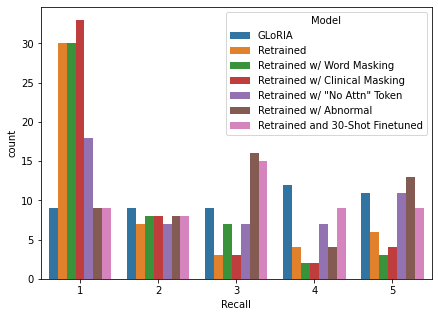

In [28]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df[~df.is_custom_prompt].groupby(['Model', 'Recall']).sum().reset_index(),
    x='Recall', y='count', hue='Model', hue_order=models.values())
plt.savefig('recall.pdf')

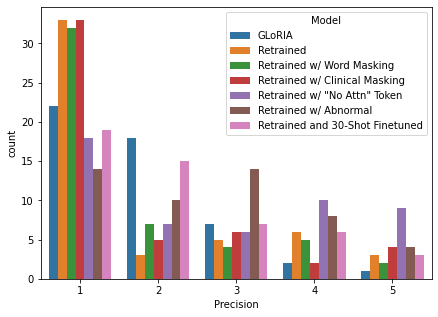

In [29]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df[~df.is_custom_prompt].groupby(['Model', 'Precision']).sum().reset_index(),
    x='Precision', y='count', hue='Model', hue_order=models.values())
plt.savefig('precision.pdf')

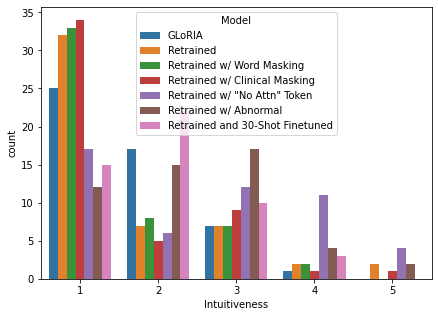

In [30]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df[~df.is_custom_prompt].groupby(['Model', 'Intuitiveness']).sum().reset_index(),
    x='Intuitiveness', y='count', hue='Model', hue_order=models.values())
plt.savefig('intuitiveness.pdf')

In [31]:
print_latex_table(df[~df.is_custom_prompt].groupby(['Model']).mean().reset_index())

Model & Recall & Precision & Intuitiveness
\hline
GLoRIA & 3.14 & 1.84 & 1.68 \\
Retrained & 1.98 & 1.86 & 1.7 \\
Retrained w/ Word Masking & 1.8 & 1.76 & 1.56 \\
Retrained w/ Clinical Masking & 1.72 & 1.78 & 1.6 \\
Retrained w/ "No Attn" Token & 2.72 & 2.7 & 2.58 \\
Retrained w/ Abnormal & 3.08 & 2.56 & 2.38 \\
Retrained and 30-Shot Finetuned & 3.02 & 2.18 & 2.02 \\


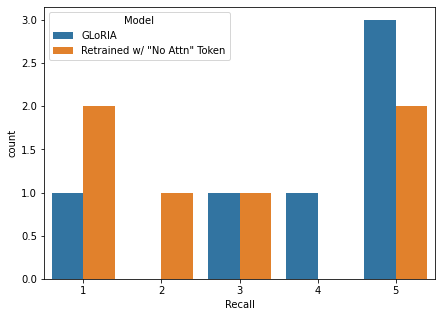

In [32]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df[df.is_custom_prompt].groupby(['Model', 'Recall']).sum().reset_index(),
    x='Recall', y='count', hue='Model')
plt.savefig('recall_custom.pdf')

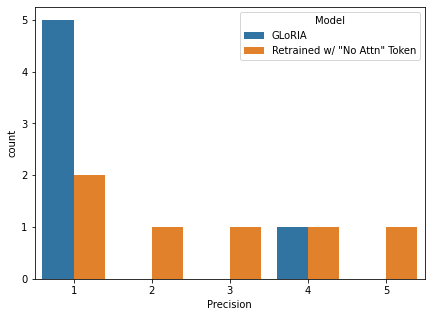

In [33]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df[df.is_custom_prompt].groupby(['Model', 'Precision']).sum().reset_index(),
    x='Precision', y='count', hue='Model')
plt.savefig('precision_custom.pdf')

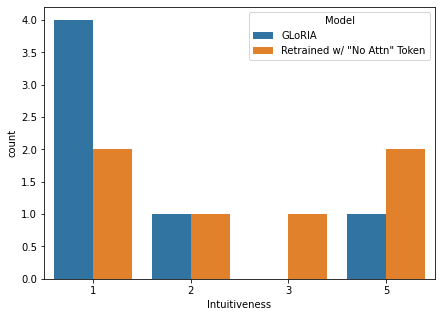

In [34]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df[df.is_custom_prompt].groupby(['Model', 'Intuitiveness']).sum().reset_index(),
    x='Intuitiveness', y='count', hue='Model')
plt.savefig('intuitiveness_custom.pdf')

In [35]:
print_latex_table(df[df.is_custom_prompt].groupby(['Model']).mean().reset_index())

Model & Recall & Precision & Intuitiveness
\hline
GLoRIA & 3.8333333333333335 & 1.5 & 1.8333333333333333 \\
Retrained w/ "No Attn" Token & 2.8333333333333335 & 2.6666666666666665 & 2.8333333333333335 \\
